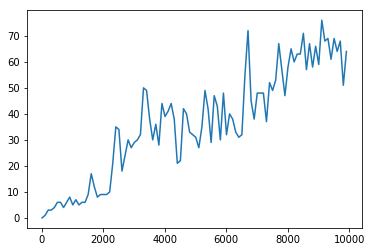

In [5]:
from pylab import *
from numpy import *
import time
from numpy import random as random_generator
from math import *

list_of_arrays_to_sort = []
min_list_size = 10
max_list_size = 10000
increments = 100


def lists_generator(end_number, size_of_list):
    already_sorted_list = list(range(size_of_list))
    random_sorted_list = random_generator.randint(end_number, size=size_of_list).tolist()
    reverse_sorted_list = already_sorted_list[::-1]
    return already_sorted_list, random_sorted_list, reverse_sorted_list


# define a function that compare and merge two lists.
def sort_merge_list_impl_j_2(left_list: [], right_list: []) ->[]:

    left_index = 0
    right_index = 0
    result_list = list()

    while left_index < len(left_list) and right_index < len(right_list):
        if left_list[left_index] < right_list[right_index]:
            result_list.append(left_list[left_index])
            left_index = left_index + 1
        else:
            result_list.append(right_list[right_index])
            right_index = right_index + 1

    if left_index == len(left_list):
        result_list = result_list + right_list[right_index:]
    if right_index == len(right_list):
        result_list = result_list + left_list[left_index:]

    return result_list


# Bilal El Uneis
# took the combined work done with Jieshu's recursive impl
# and attempted to minimize both the function and sorting
# loop in sort_merge_list_impl_b
def merge_sort_recursion_impl_b(list_to_sort: []) -> []:

    if len(list_to_sort) == 1:
        return list_to_sort

    else:
        list_size = len(list_to_sort)
        mid_index = floor(list_size / 2)
        left_list = list_to_sort[:mid_index]
        right_list = list_to_sort[mid_index:]
        left_list_sorted = merge_sort_recursion_impl_b(left_list)
        right_list_sorted = merge_sort_recursion_impl_b(right_list)
        return sort_merge_list_impl_j_2(left_list_sorted, right_list_sorted)


for list_size in range(min_list_size, max_list_size, increments):
    (_, _, worse_case_list) = lists_generator(list_size, list_size)
    list_of_arrays_to_sort.append(worse_case_list)

time_in_ms_list = []


for array_to_sort in list_of_arrays_to_sort:
    start_time = int(time.time() * 1000)
    merge_sort_recursion_impl_b(array_to_sort)
    end_time = int(time.time() * 1000)
    time_in_ms_list.append(end_time - start_time)
    
    
ns = range(min_list_size, max_list_size, increments)

plt.plot(ns, np.array(time_in_ms_list))
